In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [90]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_test.head()
#test data doesn't have casual and registered and count columns
# so this we have to solve mismatch in train and test  

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [91]:
data_train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [92]:
data_train.shape

(10886, 12)

In [93]:
data_train.isnull().sum()
data_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [94]:
data_train.columns
data_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [95]:
corr = data_train.corr()
corr.shape

(11, 11)

<AxesSubplot:>

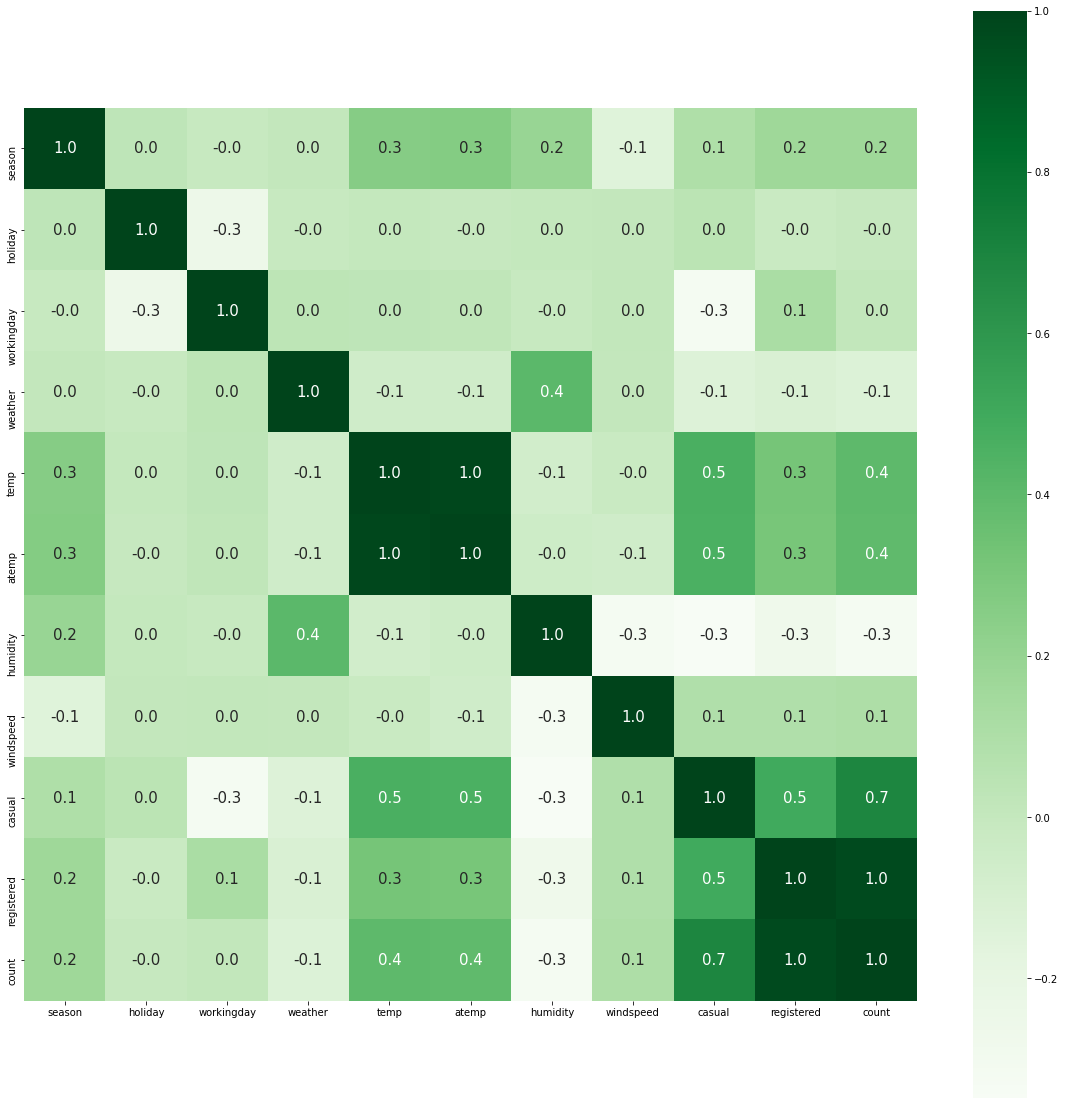

In [96]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

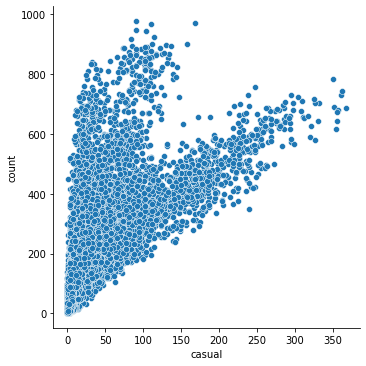

In [97]:
sns.relplot(x='casual', y='count', data=data_train)

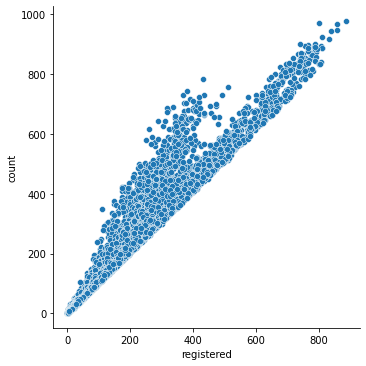

In [98]:
sns.relplot(x='registered', y='count', data=data_train)

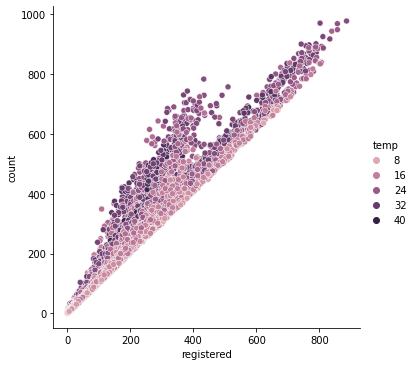

In [99]:
sns.relplot(x='registered', y='count', hue='temp', data=data_train)

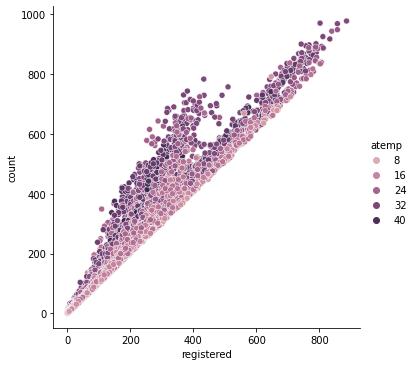

In [100]:
sns.relplot(x='registered', y='count', hue='atemp', data=data_train)

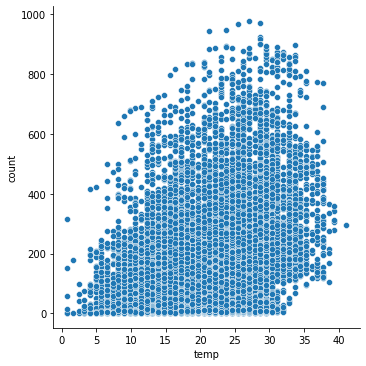

In [101]:
sns.relplot(x='temp', y='count', data=data_train)

In [102]:
data_train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [103]:
X = data_train[['casual']]
y = data_train[['count']]
data_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [105]:
X_train.shape

(8164, 1)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [107]:
simplelr = LinearRegression()
simplelr.fit(X_train, y_train)
y_train

count
5261     223
223       47
8979     343
1646     145
1022       1
...      ...
9318     326
10177    251
9648     395
5894     335
4917      58

[8164 rows x 1 columns]

In [108]:
print(simplelr.intercept_)
print(simplelr.coef_)

[99.74431214]
[[2.51970124]]


In [109]:
y_pred = simplelr.predict(X_train)
y_pred

array([[104.78371462],
       [ 99.74431214],
       [341.63563121],
       ...,
       [427.30547338],
       [150.13833695],
       [ 99.74431214]])

In [110]:
print('R^2: ', metrics.r2_score(y_train, y_pred))

R^2:  0.480532459696403


In [111]:
y_predict_on_test = simplelr.predict(X_test)

In [112]:
print(metrics.r2_score(y_predict_on_test, y_test))

-0.09271053475830238


In [113]:
X = data_train[['casual', 'registered']]
y = data_train[['count']]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [116]:
multilr = LinearRegression()
multilr.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = multilr.predict(X_train)

In [118]:
print('R^2: ', metrics.r2_score(y_train, y_pred))
#it means that we don't have any error

R^2:  1.0


In [119]:
y_prediction_on_test = multilr.predict(X_test)

In [120]:
print('R^2:', metrics.r2_score(y_prediction_on_test, y_test))
#algorithm is working properly on test data too
#again we don't have any error

R^2: 1.0


In [121]:
print(multilr.intercept_)
print(multilr.coef_)

[-5.68434189e-14]
[[1. 1.]]


In [122]:
X = data_train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']]
y = data_train[['count']]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [124]:
multilr_onall = LinearRegression()
multilr_onall.fit(X_train, y_train)
y_pred = multilr_onall.predict(X_train)

In [125]:
print('R^2: ', metrics.r2_score(y_train, y_pred))

R^2:  1.0


In [126]:
y_prediction_on_test = multilr_onall.predict(X_test)
print('R^2:', metrics.r2_score(y_prediction_on_test, y_test))

R^2: 1.0


In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

In [128]:
X_train_quadratic = poly_features.fit_transform(X_train)
quadratic = LinearRegression()
quadratic.fit(X_train_quadratic, y_train)

LinearRegression()

In [129]:
y_train_predicted = quadratic.predict(X_train_quadratic)
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [130]:
print("R^2:", metrics.r2_score(y_train_predicted, y_train))

R^2: 1.0


In [131]:
print(metrics.r2_score(y_test_predicted, y_test))
#algorithm is working properly and fitted to our data and we don't have any error

1.0
